In [4]:
import pandas as pd
import numpy as np
import ydata_profiling
from ydata_profiling import ProfileReport

In [5]:
data=pd.read_excel('C:/Users/Abhijeet Kuanr/Downloads/data/Sample - Superstore.xlsx')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [8]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [9]:
order_data = pd.read_excel('C:/Users/Abhijeet Kuanr/Downloads/data/Sample - Superstore.xlsx', sheet_name='Orders')
returns_data = pd.read_excel('C:/Users/Abhijeet Kuanr/Downloads/data/Sample - Superstore.xlsx', sheet_name='Returns')
people_data = pd.read_excel('C:/Users/Abhijeet Kuanr/Downloads/data/Sample - Superstore.xlsx', sheet_name='People')

In [10]:
profile = ProfileReport(order_data, title='super-store orders data', explorative=True)

In [11]:
profile.to_file('superstore_orders_data.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 43.30it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Lets make some Vizulazation

Import Necessary Library

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

 Convert Order Date to datetime format

In [13]:
order_data['Order Date'] = pd.to_datetime(order_data['Order Date'])

# 1. Sales Trend Over Time

 Aggregate monthly sales

In [14]:
order_data['Year-Month'] = order_data['Order Date'].dt.to_period('M')
monthly_sales = order_data.groupby('Year-Month')['Sales'].sum().reset_index()

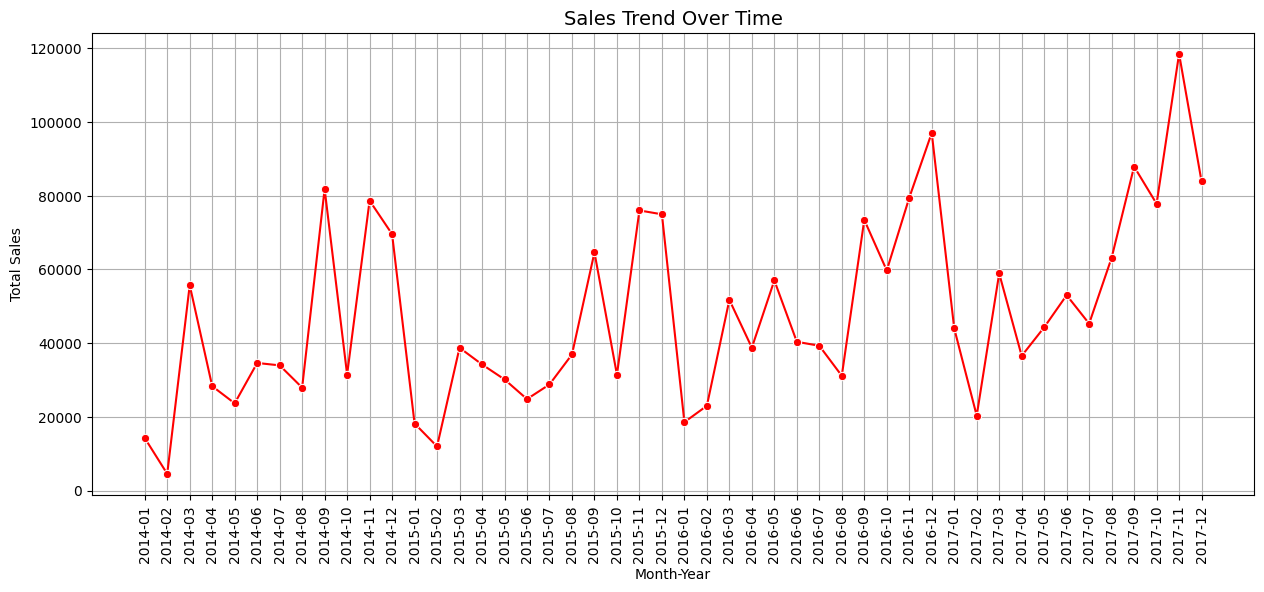

In [31]:
%matplotlib inline

# Converted 'Year-Month' to string for plotting
monthly_sales['Year-Month'] = monthly_sales['Year-Month'].astype(str)

plt.figure(figsize=(15, 6))
sns.lineplot(data=monthly_sales, x='Year-Month', y='Sales', marker="o", color="r")
plt.xticks(rotation=90)
plt.title("Sales Trend Over Time", fontsize=14)
plt.xlabel("Month-Year")
plt.ylabel("Total Sales")
plt.grid(True)
plt.show()


# 2. Sales & Profit by Region

Aggregate Sales & Profit by Region

In [39]:
region_performance = order_data.groupby('Region')[['Sales','Profit']].sum().reset_index()

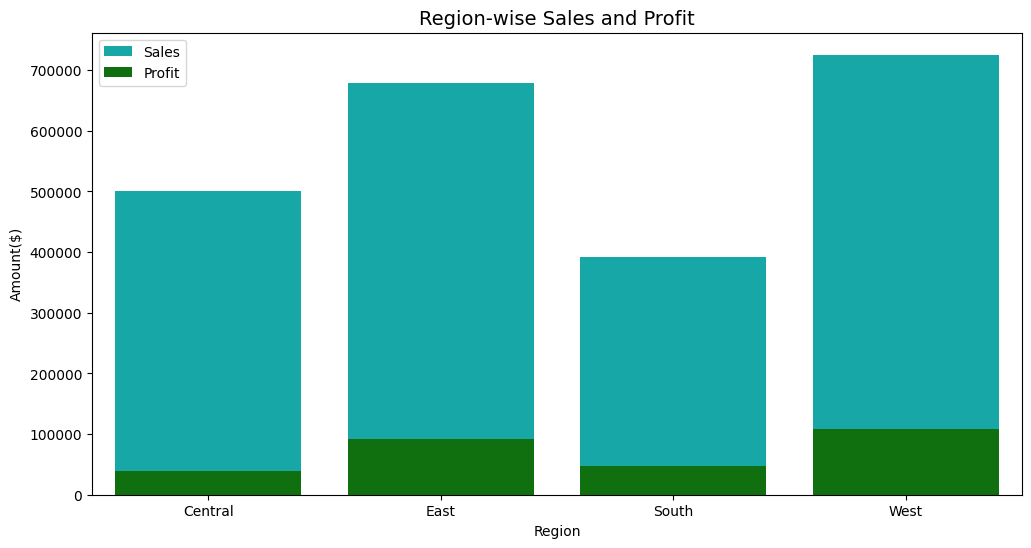

In [60]:
plt.figure(figsize=(12, 6))
sns.barplot(data=region_performance, x='Region', y='Sales', color='c', label='Sales')
sns.barplot(data=region_performance, x='Region', y='Profit', color='g', label='Profit')
plt.title("Region-wise Sales and Profit", fontsize=14)
plt.xlabel("Region")
plt.ylabel("Amount($)")
plt.legend()
plt.show()

# 3. Top 10 Best-Selling Products

Aggregate Sales by Product

In [47]:
top_products = order_data.groupby('Product Name')['Sales'].sum().sort_values(ascending=False).head(10).reset_index()

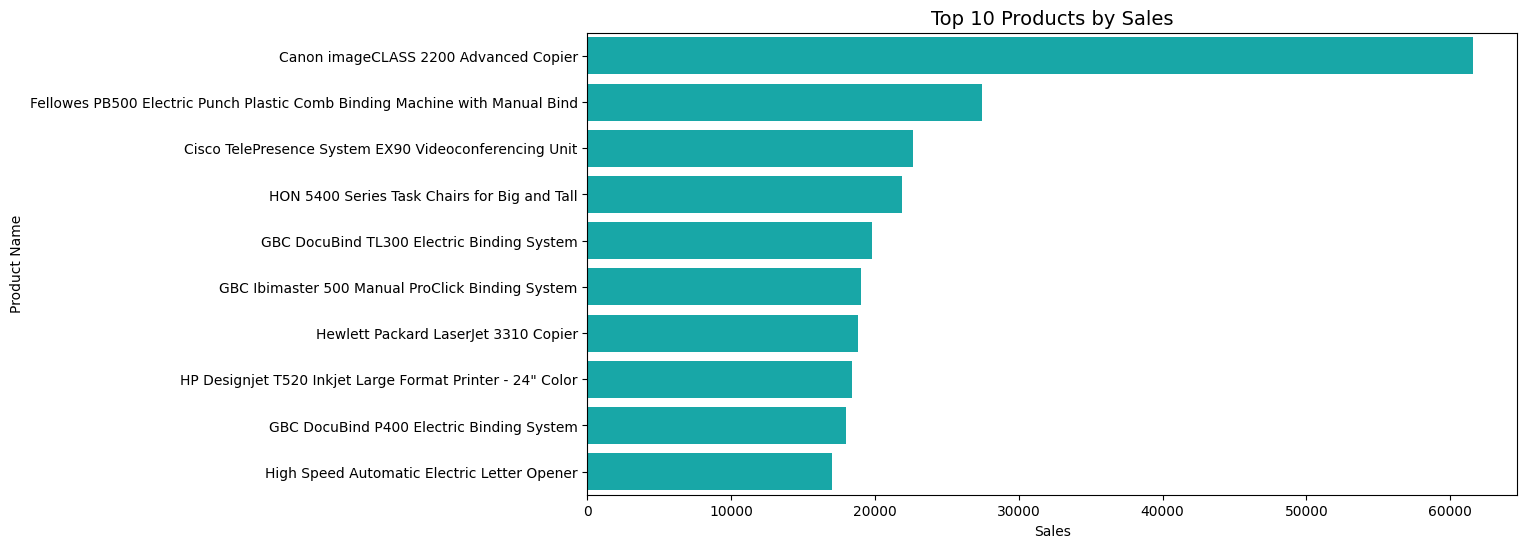

In [59]:
plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='Sales', y='Product Name', color='c')
plt.title("Top 10 Products by Sales", fontsize=14)
plt.xlabel("Sales")
plt.ylabel("Product Name")
plt.show()  

# 4. Sales by Category & Sub-Category

Aggregate Sales by Category & Sub-Category

In [62]:
category_sales = order_data.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

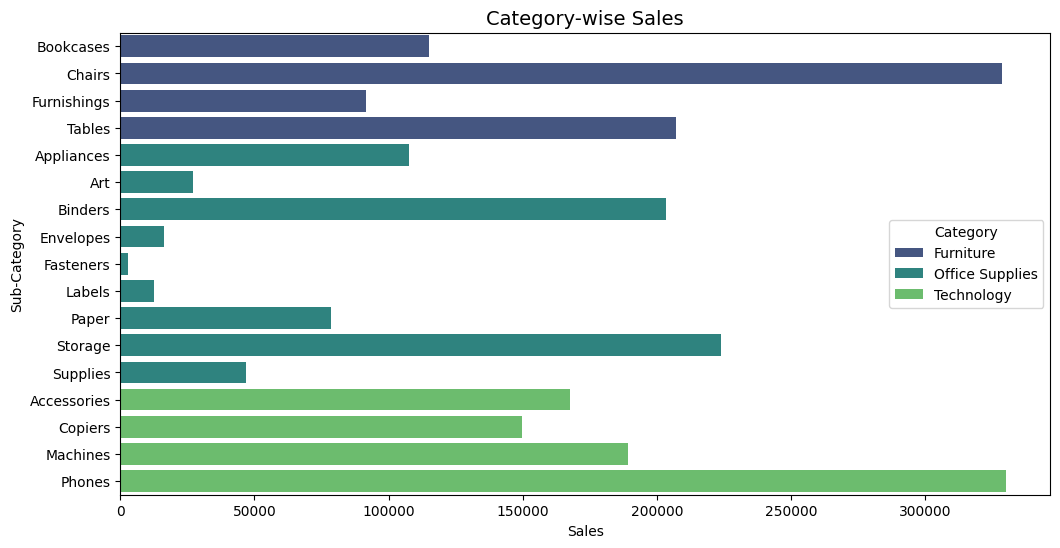

In [63]:
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='Sales', y='Sub-Category', hue='Category', palette='viridis')
plt.title("Category-wise Sales", fontsize=14)
plt.xlabel("Sales")
plt.ylabel("Sub-Category")
plt.legend(title='Category')
plt.show()

# 5. Return Rate by Category

Merge Orders with Returns

In [64]:
order_data['Returned'] = order_data['Order ID'].isin(returns_data['Order ID'])
return_analysis = order_data.groupby('Category')['Returned'].mean().reset_index()

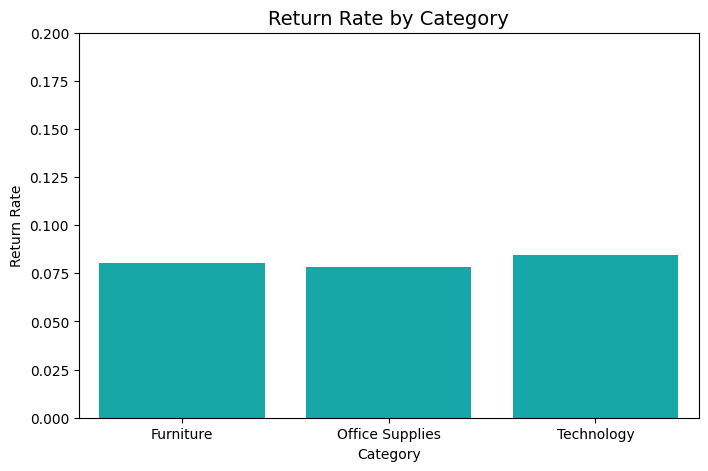

In [65]:
plt.figure(figsize=(8, 5))
sns.barplot(data=return_analysis, x='Category', y='Returned', color='c')
plt.title("Return Rate by Category", fontsize=14)
plt.xlabel("Category")
plt.ylabel("Return Rate")
plt.ylim(0, 0.2)
plt.show()

# 6. Sales Distribution by Discount

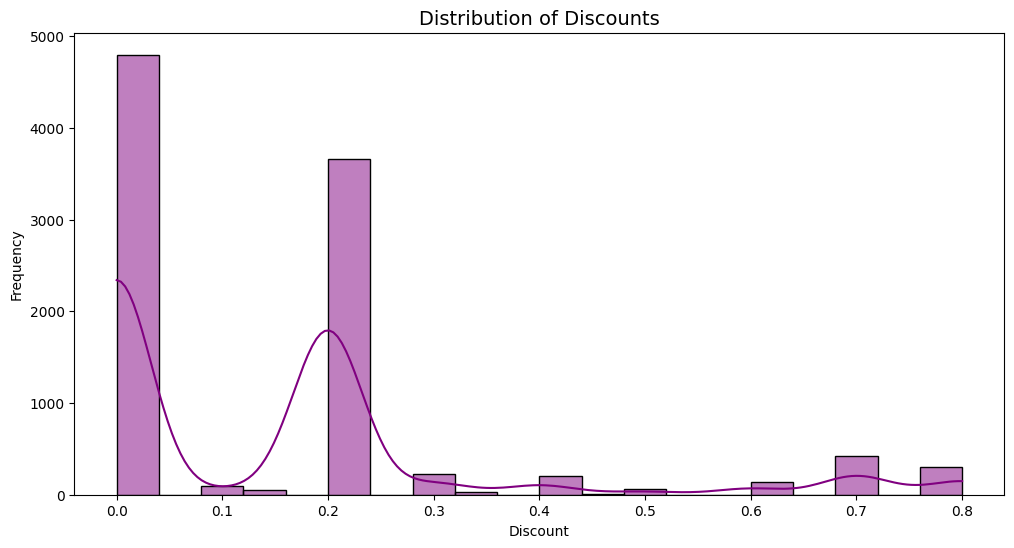

In [71]:
plt.figure(figsize=(12, 6))
sns.histplot(order_data['Discount'], bins=20, kde=True, color='purple')
plt.title("Distribution of Discounts", fontsize=14)
plt.xlabel("Discount")
plt.ylabel("Frequency")
plt.show()

# 7. Profit vs Sales Scatter Plot

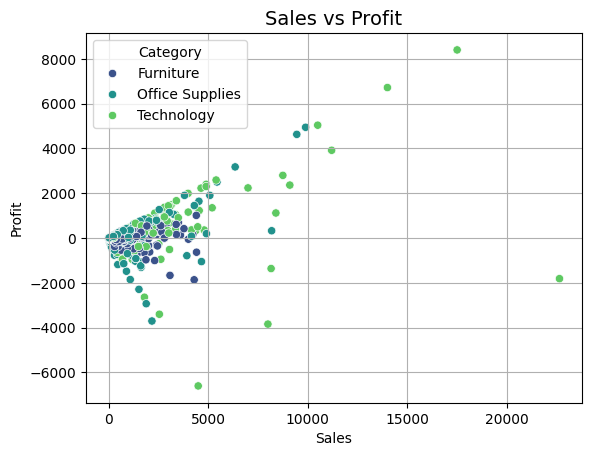

In [73]:
plt.Figure(figsize=(12, 6))
sns.scatterplot(data=order_data, x='Sales', y='Profit', hue='Category', palette='viridis')
plt.title("Sales vs Profit", fontsize=14)
plt.xlabel("Sales")
plt.ylabel("Profit")
plt.grid(True)
plt.show()
